In [1]:
import pandas as pd
from untrade.client import Client
from pprint import pprint

In [6]:
def process_data(data):
    data['SMA_20'] = data['close'].rolling(window=20).mean()  # 20-period simple moving average
    data['stddev'] = data['close'].rolling(window=20).std()   # 20-period standard deviation

    K = 2  
    data['upper_band'] = data['SMA_20'] + (K * data['stddev'])
    data['lower_band'] = data['SMA_20'] - (K * data['stddev'])
    data.drop(['stddev'], axis=1, inplace=True)
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data["rsi"] = 100 - (100 / (1 + rs))

    data["Signal"] = 0
    data.loc[(data["rsi"] < 30) | (data['close'] < data['lower_band']) , "Signal"] = -1
    data.loc[(data["rsi"] > 70) | (data['close'] > data['upper_band']) , "Signal"] = 1
    return data
    

In [7]:
def strat(data):
    signal = []
    prev = None
    for value in data["Signal"]:
        if value == prev:
            signal.append(0)
        else:
            signal.append(value)
        prev = value

    data["signals"] = signal
    return data

In [8]:
def perform_backtest(csv_file_path):
    client = Client()

    result = client.backtest(
        jupyter_id="haricharan",  
        file_path=csv_file_path,
        leverage=1,  
    )
    

    return result

In [13]:
if __name__ == "__main__":
    data = pd.read_csv("BTC_1d.csv")
    res1 = process_data(data)
    res = strat(res1)
    res.to_csv("1dayBB+RSI.csv", index=False)
    csv_file_path = "1dayBB+RSI.csv"
    backtest_result = perform_backtest(csv_file_path)

    last_value = None
    for value in backtest_result:
        last_value = value
    print(last_value)


105555,
      "Sharpe Ratio": 4.810258,
      "Sortino Ratio": 22.332059,
      "To": "2024-01-01 00:00:00"
    },
    "compound_statistics": {
      "flag": "Trades Executed: 29",
      "Initial Balance": 1000.0,
      "Leverage Applied": 1.0,
      "Number of Trades": 29,
      "Profit Percentage": 325.303153,
      "Maximum Drawdown": 67.256466,
      "Average Drawdown": 21.138355,
      "Time to Recovery(TTR)": "102.000000 days",
      "Average TTR": "86.666667 days",
      "Maximum PNL": 3348.753815,
      "Minimum PNL": -1966.012236,
      "Max Portfolio Balance": 12168.297431,
      "Minimumm Portfolio Balance": 947.829276,
      "Final Balance": 4253.031534,
      "Total Fee": 277.70077
    }
  }
}




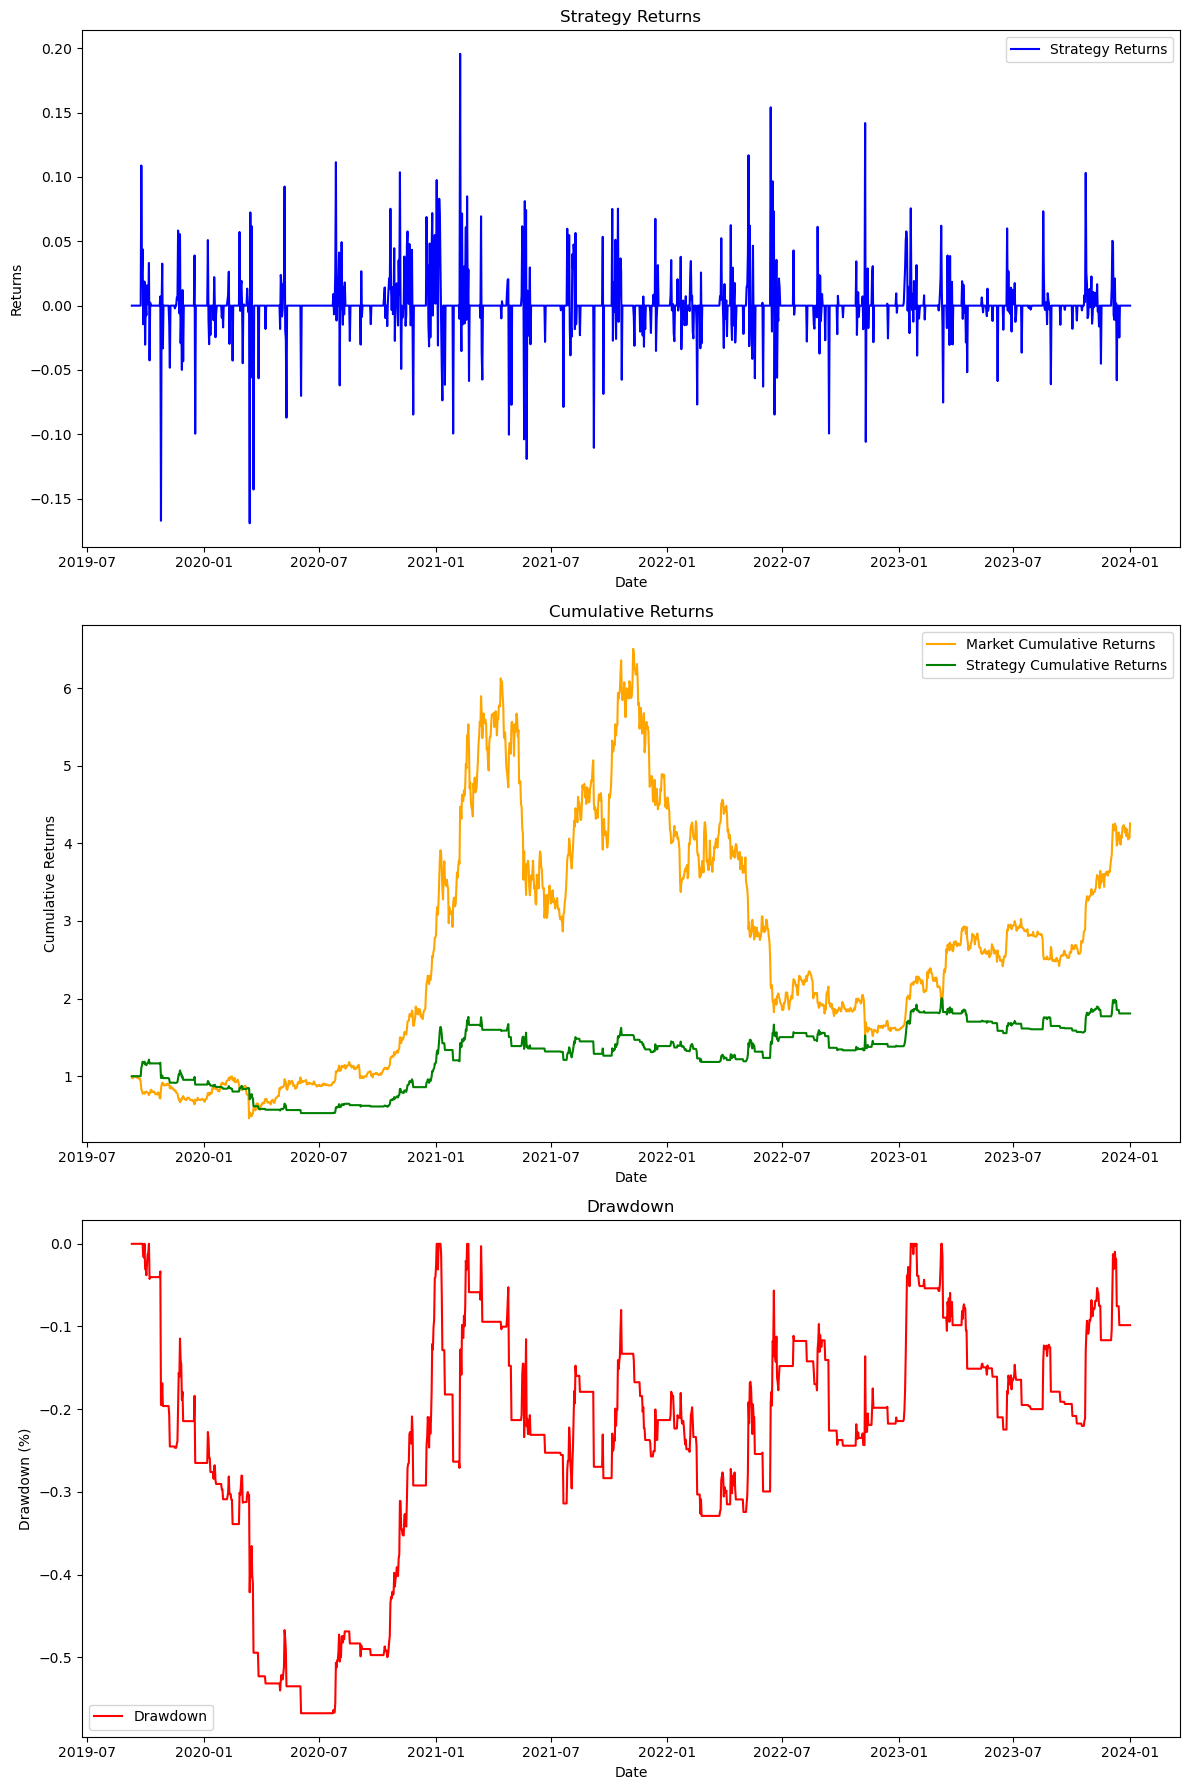

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("1dayBB+RSI.csv")
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)


data['returns'] = data['close'].pct_change()
data['strategy_returns'] = data['Signal'].shift(1) * data['returns'] 

data['cumulative_market_returns'] = (1 + data['returns']).cumprod()
data['cumulative_strategy_returns'] = (1 + data['strategy_returns']).cumprod()

data['cum_max'] = data['cumulative_strategy_returns'].cummax()
data['drawdown'] = data['cumulative_strategy_returns'] / data['cumulative_strategy_returns'].cummax() - 1

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))


ax1.plot(data.index, data['strategy_returns'], color="blue", label="Strategy Returns")
ax1.set_title("Strategy Returns")
ax1.set_xlabel("Date")
ax1.set_ylabel("Returns")
ax1.legend()

ax2.plot(data.index, data['cumulative_market_returns'], label="Market Cumulative Returns", color="orange")
ax2.plot(data.index, data['cumulative_strategy_returns'], label="Strategy Cumulative Returns", color="green")
ax2.set_title("Cumulative Returns")
ax2.set_xlabel("Date")
ax2.set_ylabel("Cumulative Returns")
ax2.legend()

# 3. Plot Drawdown
ax3.plot(data.index, data['drawdown'], color="red", label="Drawdown")
ax3.set_title("Drawdown")
ax3.set_xlabel("Date")
ax3.set_ylabel("Drawdown (%)")
ax3.legend()

plt.tight_layout()
plt.show()


In [15]:
if __name__ == "__main__":
    data = pd.read_csv("ETH_1d.csv")
    res1 = process_data(data)
    res = strat(res1)
    res.to_csv("E1dayBB+RSI.csv", index=False)
    csv_file_path = "E1dayBB+RSI.csv"
    backtest_result = perform_backtest(csv_file_path)

    last_value = None
    for value in backtest_result:
        last_value = value
    print(last_value)


5.015278,
      "Sharpe Ratio": 4.850561,
      "Sortino Ratio": 23.964878,
      "To": "2024-01-01 00:00:00"
    },
    "compound_statistics": {
      "flag": "Trades Executed: 27",
      "Initial Balance": 1000.0,
      "Leverage Applied": 1.0,
      "Number of Trades": 27,
      "Profit Percentage": 451.68587,
      "Maximum Drawdown": 71.690237,
      "Average Drawdown": 28.531412,
      "Time to Recovery(TTR)": "191.000000 days",
      "Average TTR": "124.500000 days",
      "Maximum PNL": 7736.07789,
      "Minimum PNL": -4575.830672,
      "Max Portfolio Balance": 19487.477725,
      "Minimumm Portfolio Balance": 912.143563,
      "Final Balance": 5516.858695,
      "Total Fee": 343.706317
    }
  }
}




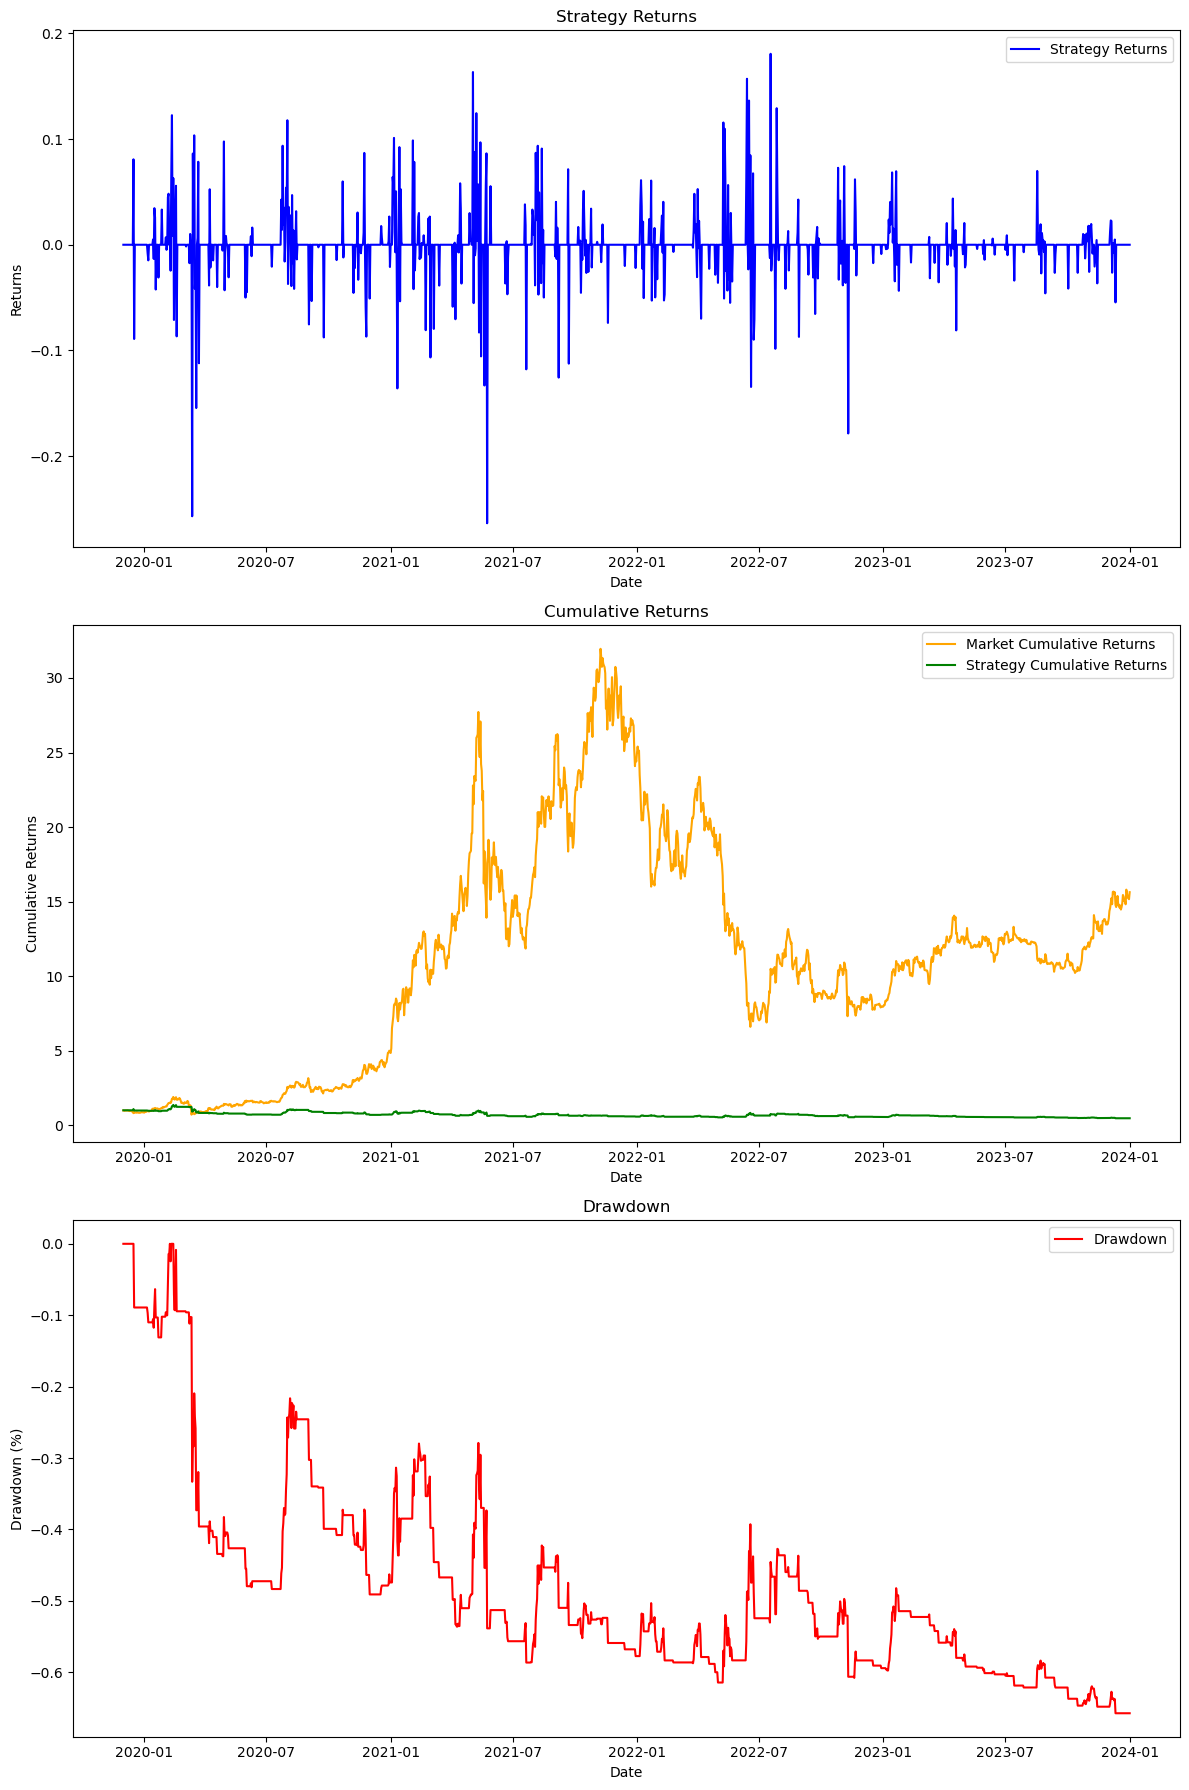

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("E1dayBB+RSI.csv")
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)


data['returns'] = data['close'].pct_change()
data['strategy_returns'] = data['Signal'].shift(1) * data['returns'] 

data['cumulative_market_returns'] = (1 + data['returns']).cumprod()
data['cumulative_strategy_returns'] = (1 + data['strategy_returns']).cumprod()

data['cum_max'] = data['cumulative_strategy_returns'].cummax()
data['drawdown'] = data['cumulative_strategy_returns'] / data['cumulative_strategy_returns'].cummax() - 1

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))


ax1.plot(data.index, data['strategy_returns'], color="blue", label="Strategy Returns")
ax1.set_title("Strategy Returns")
ax1.set_xlabel("Date")
ax1.set_ylabel("Returns")
ax1.legend()

ax2.plot(data.index, data['cumulative_market_returns'], label="Market Cumulative Returns", color="orange")
ax2.plot(data.index, data['cumulative_strategy_returns'], label="Strategy Cumulative Returns", color="green")
ax2.set_title("Cumulative Returns")
ax2.set_xlabel("Date")
ax2.set_ylabel("Cumulative Returns")
ax2.legend()

# 3. Plot Drawdown
ax3.plot(data.index, data['drawdown'], color="red", label="Drawdown")
ax3.set_title("Drawdown")
ax3.set_xlabel("Date")
ax3.set_ylabel("Drawdown (%)")
ax3.legend()

plt.tight_layout()
plt.show()
